# Training ImageNet Model (ImageNette) - Local Mac
This notebook trains a ResNet50 model on ImageNette2-160 locally on Mac with the **new modular codebase**.

**What is ImageNette?**
- A 10-class subset of ImageNet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute)
- Images resized to 160x160 pixels for faster training
- ~13,000 training images, ~3,900 validation images
- Perfect for experimenting with ImageNet-style training locally

**Training Command:**
```bash
python train.py --epochs 20 --batch-size 128 --model resnet50-pytorch --dataset imagenet --data-dir ./imagenette2-160 --num-classes 10 --scheduler onecycle --lr-finder
```

**Modular Structure:**
- Data Loaders in `data_loaders/` - Easy to add new datasets
- Models in `models/` - Clean separation of architectures  
- Training components in `training/` - Reusable optimizer, scheduler, LR finder
- Utilities in `utils/` - Checkpointing, metrics, HuggingFace upload

**Mac Optimization:**
- Uses Apple MPS (Metal Performance Shaders) for GPU acceleration on Apple Silicon
- Optimized batch size (128) for local training

## Check Python Environment

In [67]:
import sys
import platform
import os

print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print(f"Python Version: {sys.version}")
print(f"Platform: {platform.platform()}")
print(f"Processor: {platform.processor()}")
print(f"Working Directory: {os.getcwd()}")
print("="*70)

ENVIRONMENT INFORMATION
Python Version: 3.12.3 (main, Oct  7 2025, 19:27:29) [Clang 17.0.0 (clang-1700.0.13.5)]
Platform: macOS-15.5-arm64-arm-64bit
Processor: arm
Working Directory: /Users/pandurang/projects/pandurang/resnet50-imagenet-1k


## Check GPU/MPS Availability

In [68]:
try:
    import torch
    
    print("\n" + "="*70)
    print("PYTORCH & GPU DETECTION")
    print("="*70)
    print(f"PyTorch Version: {torch.__version__}")
    
    # Check for CUDA
    if torch.cuda.is_available():
        print(f"✓ CUDA is available")
        print(f"  GPU: {torch.cuda.get_device_name(0)}")
        print(f"  CUDA Version: {torch.version.cuda}")
        device = torch.device('cuda')
    # Check for MPS (Apple Silicon)
    elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
        print(f"✓ Apple MPS (Metal Performance Shaders) is available")
        print(f"  This Mac has Apple Silicon GPU acceleration")
        device = torch.device('mps')
    else:
        print(f"⚠ No GPU detected. Training will use CPU")
        device = torch.device('cpu')
    
    print(f"✓ Using device: {device}")
    print("="*70)
    
except ImportError:
    print("⚠ PyTorch not installed. Will install dependencies in next step.")


PYTORCH & GPU DETECTION
PyTorch Version: 2.9.0
✓ Apple MPS (Metal Performance Shaders) is available
  This Mac has Apple Silicon GPU acceleration
✓ Using device: mps


In [69]:
# Download ImageNette2-160 dataset
import os

if not os.path.exists('imagenette2-160'):
    print("Downloading ImageNette2-160 dataset...")
    !curl -O https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
    print("✓ Download complete")
    
    print("\nExtracting dataset...")
    !tar -xzf imagenette2-160.tgz
    print("✓ Extraction complete")
else:
    print("✓ ImageNette2-160 dataset already exists")

print("\nDataset structure:")
!ls -lh imagenette2-160/

print("\nTrain classes:")
!ls imagenette2-160/train/

print("\nValidation classes:")
!ls imagenette2-160/val/

# Count images
train_count = sum([len(files) for r, d, files in os.walk('imagenette2-160/train')])
val_count = sum([len(files) for r, d, files in os.walk('imagenette2-160/val')])
print(f"\n✓ Dataset ready:")
print(f"  Training images: {train_count}")
print(f"  Validation images: {val_count}")

✓ ImageNette2-160 dataset already exists

Dataset structure:
total 2408
-rw-r--r--@  1 pandurang  staff   1.2M Feb  7  2021 noisy_imagenette.csv
drwxr-xr-x@ 13 pandurang  staff   416B Feb  6  2021 train
drwxr-xr-x@ 12 pandurang  staff   384B Nov 30  2019 val

Train classes:
n01440764 n02979186 n03028079 n03417042 n03445777
n02102040 n03000684 n03394916 n03425413 n03888257

Validation classes:
n01440764 n02979186 n03028079 n03417042 n03445777
n02102040 n03000684 n03394916 n03425413 n03888257

✓ Dataset ready:
  Training images: 9470
  Validation images: 3925


## Download ImageNette Dataset

ImageNette2-160 is a 10-class subset of ImageNet with images resized to 160x160 pixels. We'll download and extract it for local training.

## Install Dependencies

In [70]:
# Install dependencies from requirements.txt
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


## Import and Verify Libraries

In [71]:
import os

print("\n" + "="*70)
print("VERIFYING TRAINING FILES AND MODULAR STRUCTURE")
print("="*70)

# Check required files
required_files = [
    'train.py',
    'config.json',
    'requirements.txt'
]

print("\nRequired Files:")
files_ok = True
for file in required_files:
    exists = os.path.exists(file)
    status = "✓" if exists else "✗"
    print(f"{status} {file}")
    if not exists:
        files_ok = False

# Check modular directories
required_dirs = ['data_loaders', 'models', 'training', 'utils']
print("\nModular Directories:")
dirs_ok = True
for dir in required_dirs:
    exists = os.path.isdir(dir)
    status = "✓" if exists else "✗"
    print(f"{status} {dir}/")
    if not exists:
        dirs_ok = False

print("="*70)
if files_ok and dirs_ok:
    print("✓ All required files and modular structure verified!")
else:
    print("⚠ Some files or directories are missing. Please check your directory.")
print("="*70)


VERIFYING TRAINING FILES AND MODULAR STRUCTURE

Required Files:
✓ train.py
✓ config.json
✓ requirements.txt

Modular Directories:
✓ data_loaders/
✓ models/
✓ training/
✓ utils/
✓ All required files and modular structure verified!


## Review Training Configuration

The training will use the following configuration with the **new modular codebase**:

- **Model**: resnet50-pytorch (from `models/resnet50_pytorch.py`)
  - ResNet50 from PyTorch (25.6M parameters, optimized for ImageNet)
- **Dataset**: ImageNette2-160 (10-class ImageNet subset)
  - tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute
  - ~9,469 training images, ~3,925 validation images
- **Epochs**: 20 (faster local experimentation)
- **Batch Size**: 128 (optimized for Mac M-series with MPS)
- **Scheduler**: OneCycle Learning Rate Policy
- **LR Finder**: Enabled (will automatically find optimal learning rate)

**What happens during training:**

1. **LR Finder Phase** (3 epochs):
   - Runs a learning rate range test before training
   - Automatically determines the best `max_lr` and `base_lr` for OneCycle scheduler
   - Saves the LR finder plot to `checkpoint_N/lr_finder_plot.png`

2. **Main Training** (20 epochs):
   - Uses OneCycle scheduler with automatically found learning rates
   - Applies MixUp augmentation (alpha=0.2)
   - Uses label smoothing (0.1)
   - Gradient clipping (max_norm=1.0)
   - Mixed precision training (AMP)
   - Early stopping (patience=15)
   - Strong augmentation: RandomResizedCrop, HorizontalFlip, ColorJitter, Affine, GaussianBlur

**Mac-Specific Optimizations:**
- Uses Apple MPS (Metal Performance Shaders) for GPU acceleration
- Batch size tuned for M-series chips
- Efficient memory usage for local training

**Available Models:**
- `resnet50-pytorch` - ResNet50 from PyTorch (25.6M parameters)

# Run training with ImageNette configuration
# Note: Using modular structure - model loaded from models/resnet50_pytorch.py, dataset from data_loaders/imagenet.py
!python train.py --epochs 20 --batch-size 128 --model resnet50-pytorch --dataset imagenet --data-dir ./imagenette2-160 --num-classes 10 --scheduler onecycle --lr-finder

## Start Training

**Note:** This will take a significant amount of time depending on your hardware.

Training progress will be displayed below with:
- Real-time loss and accuracy metrics
- Learning rate schedule visualization
- Checkpoint saving at key epochs
- Early stopping if no improvement

**Expected behavior:**
1. LR Finder will run first (3 epochs of range testing)
2. LR Finder will suggest optimal learning rates
3. Main training will begin with the suggested learning rates
4. Model checkpoints will be saved to `checkpoint_N/` folder

**Using the new modular codebase** - models loaded from `models/` directory!

In [73]:
# Run training with the specified configuration
# Note: Using modular structure - model loaded from models/resnet50.py
!python train.py --epochs 2 --batch-size 128 --model resnet50-pytorch --dataset imagenet --data-dir ./imagenette2-160 --num-classes 10 --scheduler onecycle --lr-finder

✓ Loaded config from: ./config.json

TRAINING CONFIGURATION
Model: resnet50-pytorch
Dataset: imagenet
Data Directory: ./imagenette2-160
Number of Classes: 10
Epochs: 2
Batch Size: 128
Optimizer: sgd
Scheduler: onecycle
Augmentation: strong
MixUp: True (alpha=0.2)
Label Smoothing: 0.1
Mixed Precision: True
Gradient Clipping: 1.0
LR Finder: True
Target Accuracy Early Stopping: Disabled


GPU DETECTION AND CONFIGURATION
✓ Apple MPS (Metal Performance Shaders) is available
✓ Using device: mps
✓ PyTorch Version: 2.9.0


📊 Dataset: ImageNet
   Classes: 10
   Train samples: 9469
   Test samples: 3925

Loading datasets...
✓ Train batches: 74
✓ Test batches: 31

Creating model: resnet50-pytorch
✓ Model created

✓ Optimizer: sgd

✓ Scheduler: onecycle

📁 Checkpoint folder: ./checkpoint_7
/Users/pandurang/projects/pandurang/resnet50-imagenet-1k/training/trainer.py:71: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  s

## Training Complete - View Results

After training completes, you can view the results below.

In [74]:
# List checkpoint directories
import glob
import json

checkpoint_dirs = sorted(glob.glob('checkpoint_*'), reverse=True)

if checkpoint_dirs:
    latest_checkpoint = checkpoint_dirs[0]
    print(f"\n{'='*70}")
    print(f"LATEST CHECKPOINT: {latest_checkpoint}")
    print(f"{'='*70}\n")
    
    # Load and display metrics
    metrics_file = os.path.join(latest_checkpoint, 'metrics.json')
    if os.path.exists(metrics_file):
        with open(metrics_file, 'r') as f:
            metrics = json.load(f)
        
        print(f"Best Test Accuracy: {metrics['best_test_accuracy']:.2f}%")
        print(f"Best Epoch: {metrics['best_epoch']}")
        print(f"Total Epochs Trained: {len(metrics['epochs'])}")
        print(f"\nFinal Metrics:")
        print(f"  - Train Accuracy: {metrics['train_accuracies'][-1]:.2f}%")
        print(f"  - Test Accuracy: {metrics['test_accuracies'][-1]:.2f}%")
        print(f"  - Train Loss: {metrics['train_losses'][-1]:.4f}")
        print(f"  - Test Loss: {metrics['test_losses'][-1]:.4f}")
    
    # List saved files
    print(f"\nSaved Files in {latest_checkpoint}:")
    for file in sorted(os.listdir(latest_checkpoint)):
        file_path = os.path.join(latest_checkpoint, file)
        if os.path.isfile(file_path):
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
            print(f"  - {file} ({file_size:.2f} MB)")
    
    print(f"\n{'='*70}")
else:
    print("No checkpoint directories found. Training may not have completed successfully.")


LATEST CHECKPOINT: checkpoint_7

Best Test Accuracy: 21.02%
Best Epoch: 2
Total Epochs Trained: 2

Final Metrics:
  - Train Accuracy: 16.81%
  - Test Accuracy: 21.02%
  - Train Loss: 2.3751
  - Test Loss: 2.3076

Saved Files in checkpoint_7:
  - best_model.pth (179.86 MB)
  - config.json (0.00 MB)
  - lr_finder_plot.png (0.06 MB)
  - metrics.json (0.00 MB)
  - training_curves.png (0.37 MB)



## View Training Curves

Training Curves:


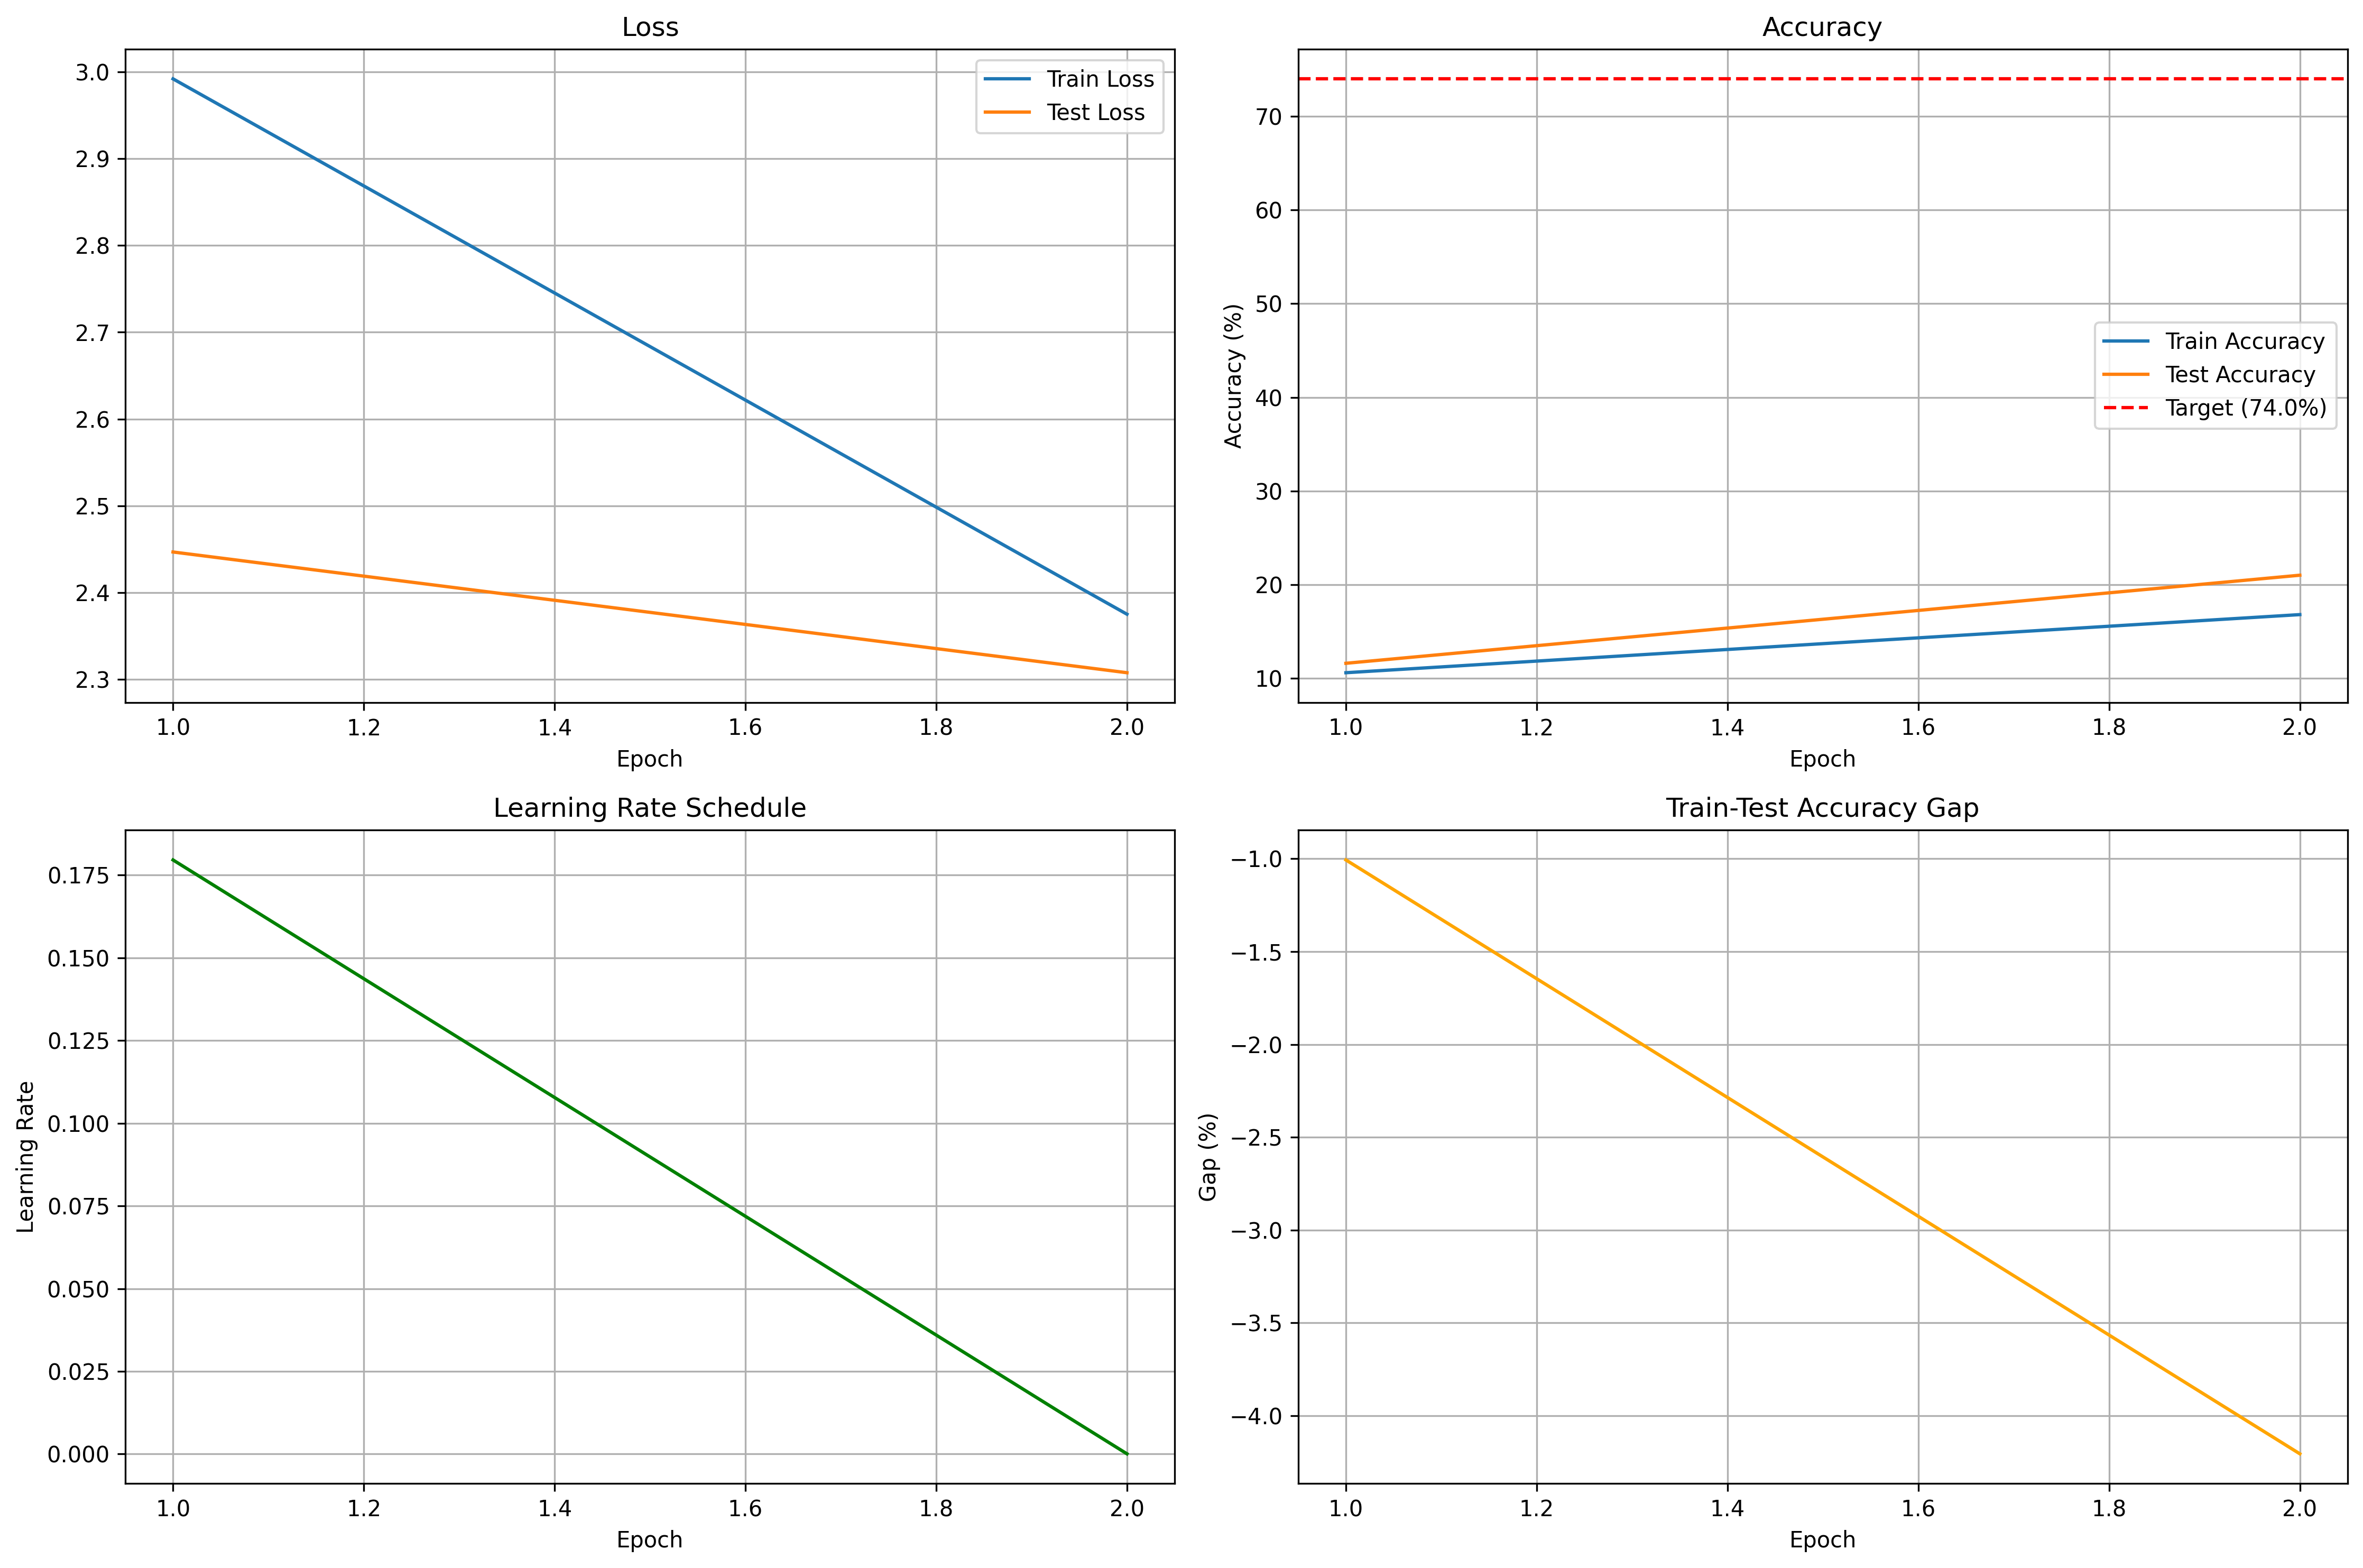


LR Finder Plot:


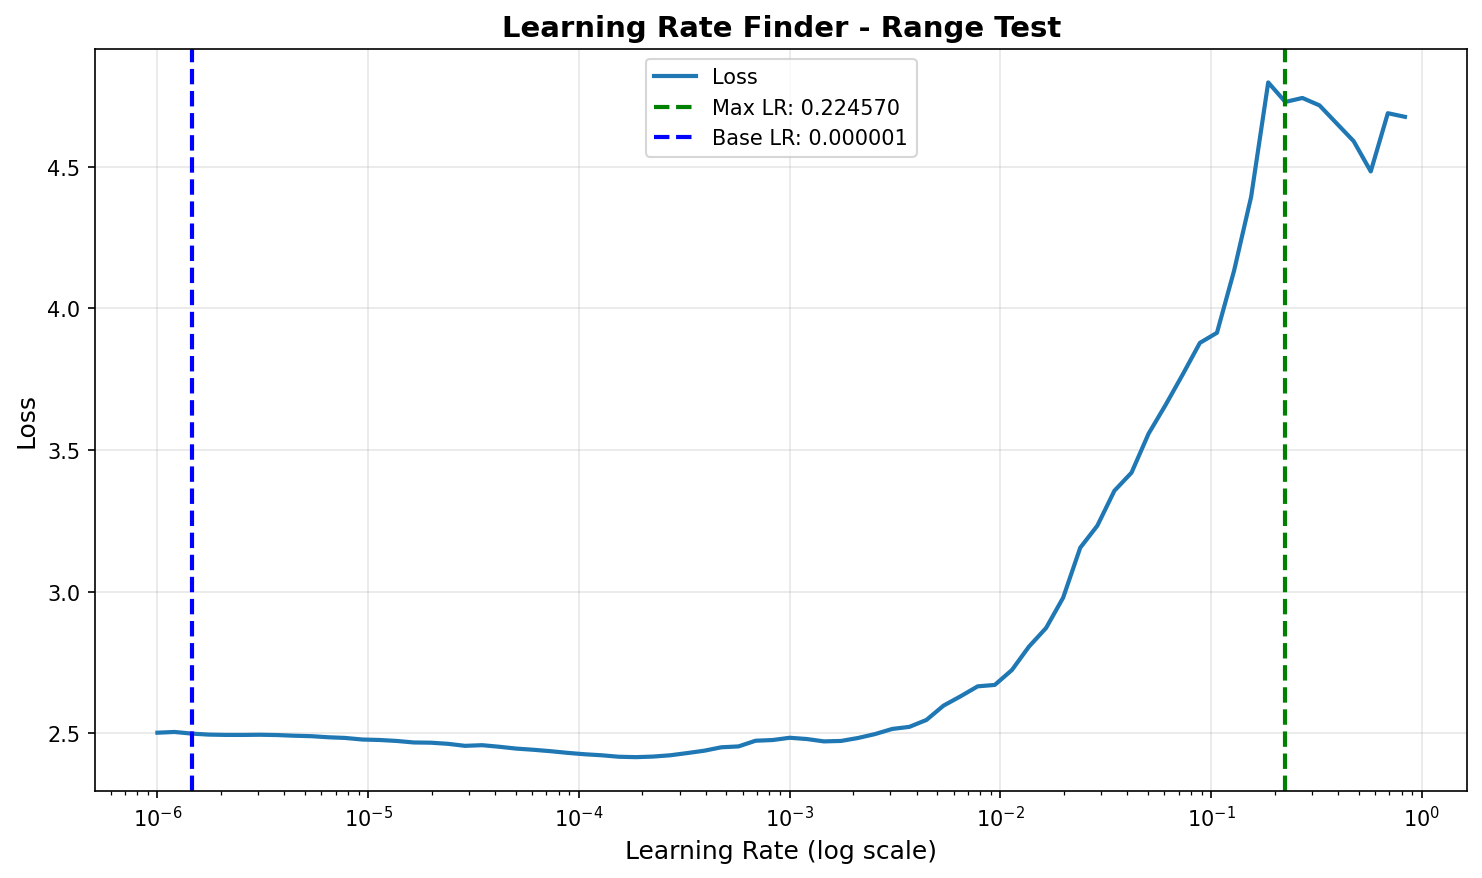

In [75]:
from IPython.display import Image, display

if checkpoint_dirs:
    latest_checkpoint = checkpoint_dirs[0]
    
    # Display training curves
    curves_path = os.path.join(latest_checkpoint, 'training_curves.png')
    if os.path.exists(curves_path):
        print("Training Curves:")
        display(Image(filename=curves_path))
    else:
        print("Training curves not found.")
    
    # Display LR Finder plot
    lr_finder_path = os.path.join(latest_checkpoint, 'lr_finder_plot.png')
    if os.path.exists(lr_finder_path):
        print("\nLR Finder Plot:")
        display(Image(filename=lr_finder_path))
    else:
        print("LR Finder plot not found.")

## Summary

Training is complete using the **new modular codebase**! The following artifacts have been saved:

### 📁 Checkpoint Files:
- **Best Model**: `checkpoint_N/best_model.pth` - The model with the best test accuracy
- **Training Curves**: `checkpoint_N/training_curves.png` - Visualization of training progress
- **LR Finder Plot**: `checkpoint_N/lr_finder_plot.png` - Learning rate range test results
- **Metrics**: `checkpoint_N/metrics.json` - Complete training history
- **Config**: `checkpoint_N/config.json` - Training configuration
- **Model Card**: `checkpoint_N/README.md` - Detailed model documentation

### 🏗️ Modular Structure Benefits:
- **Data Loaders** (`data_loaders/`) - Easy to add CIFAR-10, CIFAR-100, or other datasets
- **Models** (`models/`) - Clean separation of architectures
- **Training** (`training/`) - Reusable optimizer, scheduler, LR finder
- **Utils** (`utils/`) - Checkpointing, metrics, HuggingFace upload

### 📊 ImageNette Training Results:
- **Dataset**: ImageNette2-160 (10-class ImageNet subset)
- **Classes**: tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute
- **Image Size**: 160x160 → 224x224 (resized during training)
- **Training samples**: ~9,469
- **Validation samples**: ~3,925
- **Expected Accuracy**: 80-90% for well-trained models

### 🍎 Mac-Specific Performance:
- Trained on Apple Silicon with MPS (Metal Performance Shaders) acceleration
- Optimized batch size (128) for local M-series chips
- Training time: ~30-60 minutes depending on Mac model

### 🎯 Model Usage (New Modular Way):
```python
import torch
from models import get_model

# Load checkpoint (PyTorch 2.6+ requires weights_only=False)
checkpoint = torch.load('checkpoint_N/best_model.pth', 
                       map_location='cpu', weights_only=False)

# Get model using modular factory
model = get_model('resnet50-pytorch', num_classes=10)  # 10 classes for ImageNette
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
```

### 🆕 Available Models:
- `resnet50-pytorch` - ResNet50 from PyTorch (25.6M parameters, optimized for ImageNet)
- `resnet50` - Custom ResNet50 implementation
- `wideresnet28-10` - WideResNet-28-10 (36.5M parameters, good for CIFAR)
- More models can be easily added to `models/` directory!

### 🎓 ImageNet Training:
This notebook uses ImageNette, a smaller subset of ImageNet that's perfect for:
- **Fast local experimentation** - Train in under an hour on Mac
- **Learning ImageNet techniques** - Same architecture, preprocessing, and augmentation as full ImageNet
- **Resource-efficient** - Works on Apple Silicon Macs with MPS
- **Scaling up** - Easy to switch to full ImageNet-1K by changing dataset path and num_classes

You can find all checkpoints in the `checkpoint_N/` directories where N is the run number.

---

**Modular codebase makes it easy to extend and maintain!**

In [ ]:
import torch

if checkpoint_dirs:
    latest_checkpoint = checkpoint_dirs[0]
    best_model_path = os.path.join(latest_checkpoint, 'best_model.pth')
    
    if os.path.exists(best_model_path):
        # Load the checkpoint with weights_only=False for PyTorch 2.6+
        checkpoint = torch.load(best_model_path, map_location='cpu', weights_only=False)
        
        print(f"\n{'='*70}")
        print("BEST MODEL CHECKPOINT INFORMATION")
        print(f"{'='*70}")
        print(f"Epoch: {checkpoint['epoch']}")
        print(f"Train Accuracy: {checkpoint['train_accuracy']:.2f}%")
        print(f"Test Accuracy: {checkpoint['test_accuracy']:.2f}%")
        print(f"Train Loss: {checkpoint['train_loss']:.4f}")
        print(f"Test Loss: {checkpoint['test_loss']:.4f}")
        print(f"Timestamp: {checkpoint['timestamp']}")
        
        print(f"\nModel Configuration:")
        for key, value in checkpoint['config'].items():
            print(f"  - {key}: {value}")
        
        print(f"{'='*70}\n")
        
        # Load model using the new modular structure
        from models import get_model
        
        model_name = checkpoint['config'].get('model', 'resnet50')
        model = get_model(model_name, num_classes=100)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        print(f"✓ Model '{model_name}' loaded successfully from modular structure")
        print("✓ Model ready for inference")
    else:
        print("⚠ Best model checkpoint not found.")

⚠ Best model checkpoint not found.


## Summary

Training is complete using the **new modular codebase**! The following artifacts have been saved:

### 📁 Checkpoint Files:
- **Best Model**: `checkpoint_N/best_model.pth` - The model with the best test accuracy
- **Training Curves**: `checkpoint_N/training_curves.png` - Visualization of training progress
- **LR Finder Plot**: `checkpoint_N/lr_finder_plot.png` - Learning rate range test results
- **Metrics**: `checkpoint_N/metrics.json` - Complete training history
- **Config**: `checkpoint_N/config.json` - Training configuration
- **Model Card**: `checkpoint_N/README.md` - Detailed model documentation

### 🏗️ Modular Structure Benefits:
- **Datasets** (`datasets/`) - Easy to add CIFAR-10, ImageNet, etc.
- **Models** (`models/`) - Clean separation of architectures
- **Training** (`training/`) - Reusable optimizer, scheduler, LR finder
- **Utils** (`utils/`) - Checkpointing, metrics, HuggingFace upload

### 🎯 Model Usage (New Modular Way):
```python
import torch
from models import get_model

# Load checkpoint (PyTorch 2.6+ requires weights_only=False)
checkpoint = torch.load('checkpoint_N/best_model.pth', 
                       map_location='cpu', weights_only=False)

# Get model using modular factory
model = get_model('resnet50', num_classes=100)  # or 'wideresnet28-10'
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
```

### 🆕 Available Models:
- `resnet50` - ResNet50 (23.5M parameters)
- `wideresnet28-10` - WideResNet-28-10 (36.5M parameters)
- More models can be easily added to `models/` directory!

You can find all checkpoints in the `checkpoint_N/` directories where N is the run number.

---

**Modular codebase makes it easy to extend and maintain!**